In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv(r"C:\Users\johnk\ml-project-unsupervised-learning\Data\Wholesale_Data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
clean_data = pd.read_csv(r"C:\Users\johnk\ml-project-unsupervised-learning\Data\clean_data.csv")
clean_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.00
4,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25


In [9]:
X=clean_data.iloc[::].values
print(X.shape)
X

(440, 6)


array([[12669.   ,  9656.   ,  7561.   ,   214.   ,  2674.   ,  1338.   ],
       [ 7057.   ,  9810.   ,  9568.   ,  1762.   ,  3293.   ,  1776.   ],
       [ 6353.   ,  8808.   ,  7684.   ,  2405.   ,  3516.   ,  3938.25 ],
       ...,
       [14531.   , 15488.   , 23409.875,   437.   ,  9419.875,  1867.   ],
       [10290.   ,  1981.   ,  2232.   ,  1038.   ,   168.   ,  2125.   ],
       [ 2787.   ,  1698.   ,  2510.   ,    65.   ,   477.   ,    52.   ]])

In [10]:
#scalling the clean data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(X)
  wcss.append(model.inertia_)

c:\Users\johnk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\johnk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\johnk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\johnk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

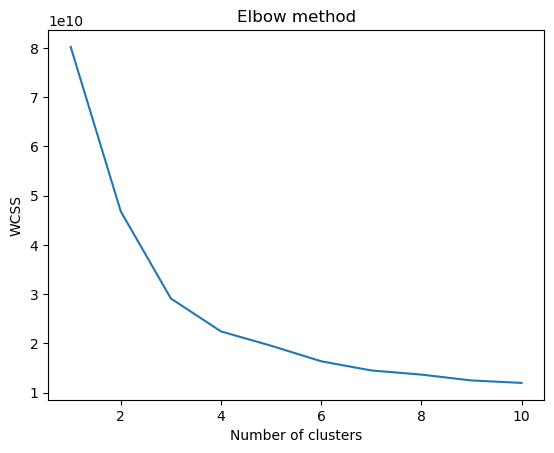

In [12]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
# Kmeans model
kmeans = KMeans(n_clusters = 4, init='k-means++',  random_state = 42)
kmeans_scaled = KMeans(n_clusters = 4, init='k-means++',  random_state = 42)

# Fit ans predict on the Scaled data
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)
print(y_kmeans_scaled.shape)
y_kmeans_scaled

(440,)


c:\Users\johnk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([2, 0, 3, 1, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 3, 2, 0, 2, 3, 2, 2, 2,
       1, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 0, 3, 0, 0, 1, 1, 2, 0, 0,
       0, 3, 0, 3, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 3, 2, 0, 2, 0,
       2, 0, 1, 2, 1, 3, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 3, 2, 2, 3, 0, 1,
       1, 1, 2, 1, 3, 1, 0, 2, 2, 2, 2, 1, 3, 0, 0, 1, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 3, 3, 2, 2, 2, 0, 3, 2, 0, 2, 0,
       1, 2, 2, 1, 2, 3, 0, 3, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 3, 2,
       2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       0, 3, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

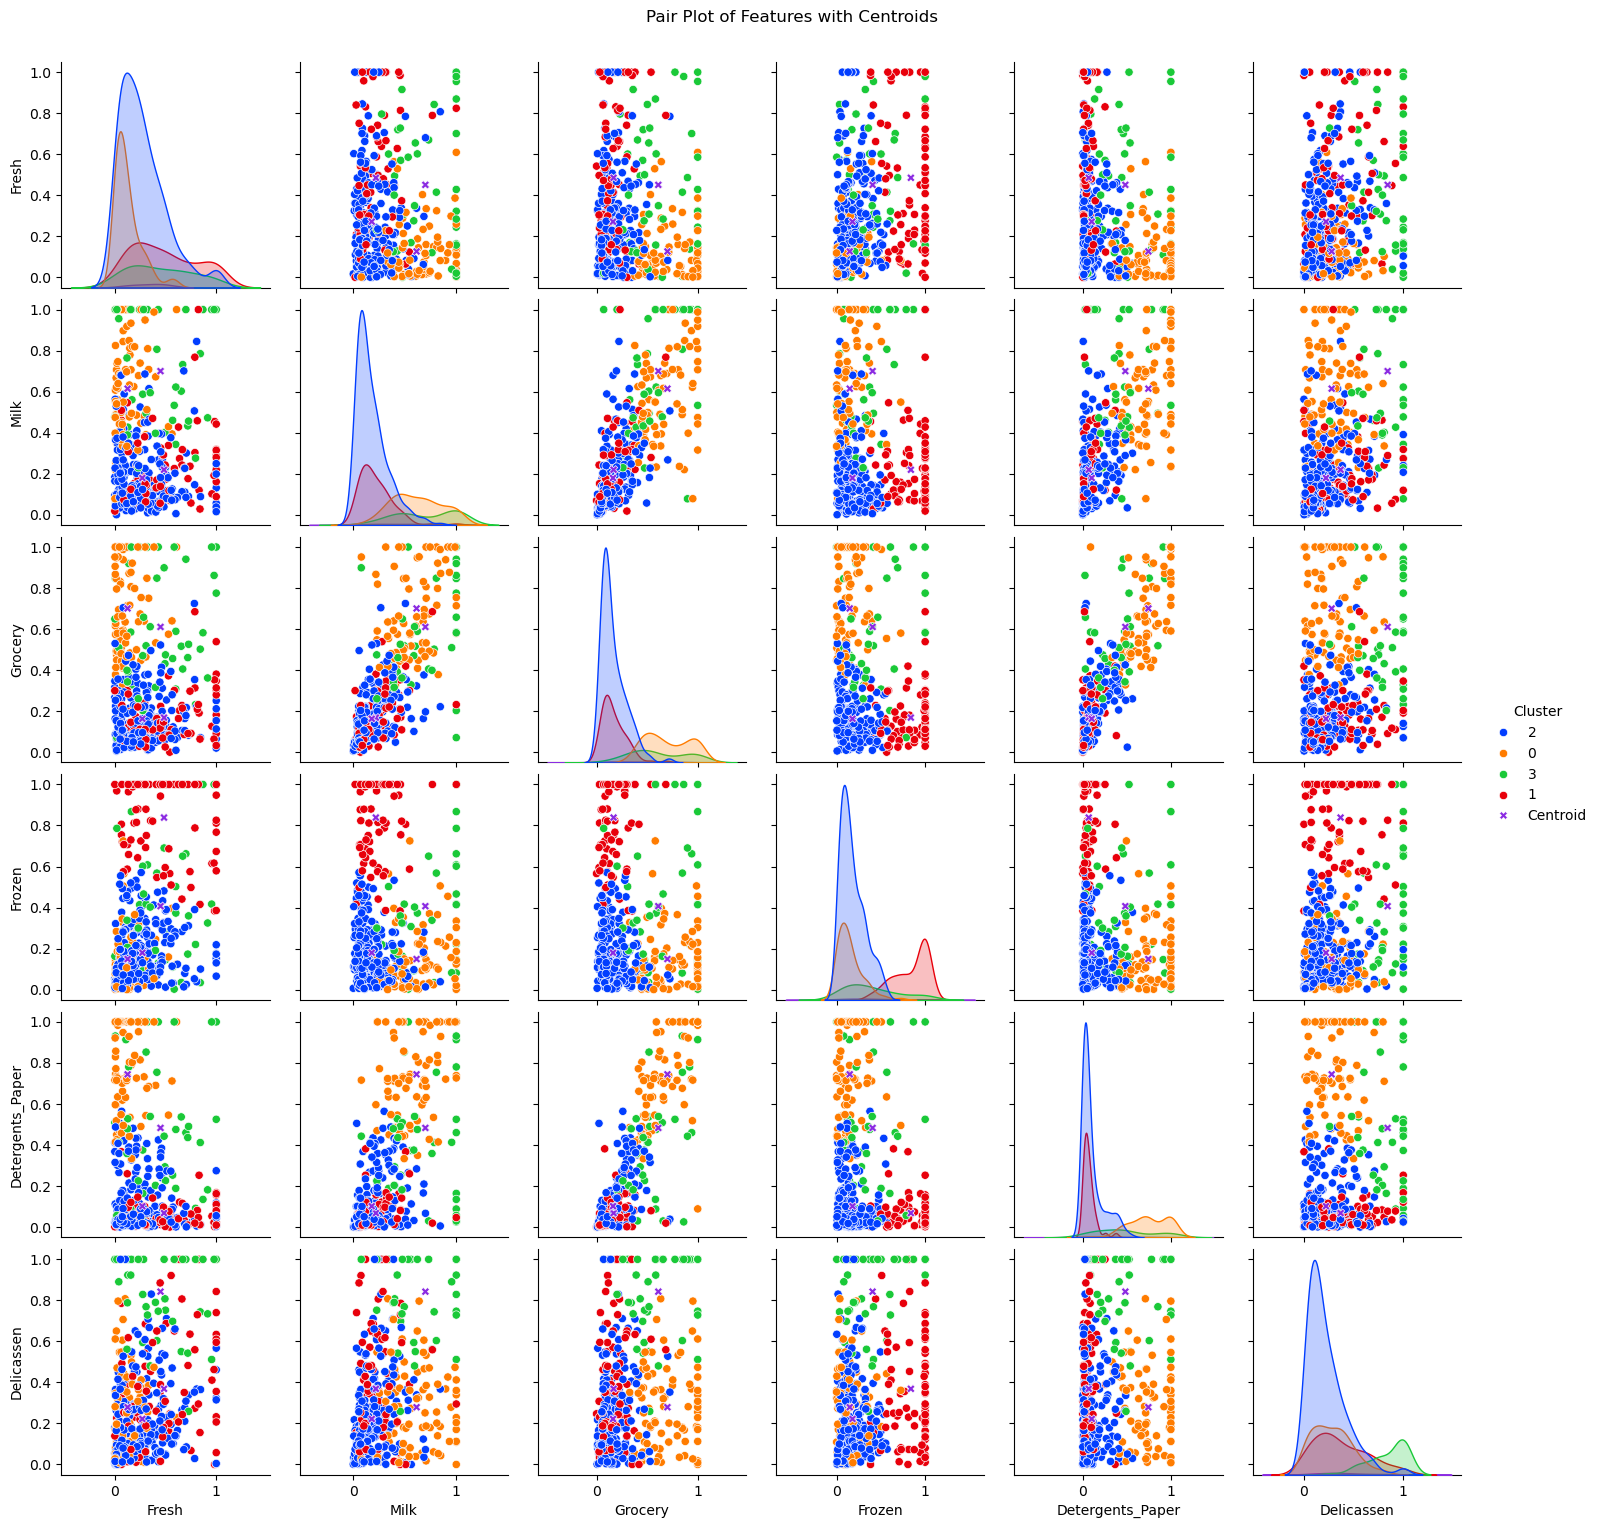

In [16]:
features = clean_data.columns
df = pd.DataFrame(X_scaled, columns=features)

df['Cluster'] = y_kmeans_scaled

centroids_df_scaled = pd.DataFrame(kmeans_scaled.cluster_centers_, columns=features)
centroids_df_scaled['Cluster'] = ['Centroid'] * kmeans_scaled.n_clusters

combined_df_scaled = pd.concat([df, centroids_df_scaled], ignore_index=True)

sns.pairplot(combined_df_scaled, hue='Cluster', palette='bright', markers=['o']*kmeans_scaled.n_clusters + ['X'])

plt.suptitle('Pair Plot of Features with Centroids', y=1.02)
plt.show()